In [19]:
import requests
from bs4 import BeautifulSoup

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

# Make a GET request to fetch the raw HTML content
try:
    response = requests.get(url)
    response.raise_for_status()  # Raises an HTTPError if the response code was not 200

    # Parse the content of the request with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Select the first table found in the page which lists the S&P 500 companies
    table = soup.find('table', {'class': 'wikitable sortable'})

    # Initialize a list to store the company symbols
    stocks = []

    # Loop through the rows in the table, skipping the header row
    for row in table.find_all('tr')[1:]:
        cells = row.find_all('td')
        symbol = cells[0].text.strip()  # The first cell in each row contains the symbol
        stocks.append(symbol)

    print(stocks)

except requests.RequestException as e:
    print(e)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DH

In [20]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [21]:
# Set the start and end dates for the past 1 year
start_date = '2023-03-12'
end_date = '2024-03-12'

# Download the stock data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']
data

[*********************100%%**********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2023-03-12 -> 2024-03-12)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-13,135.703995,14.85,149.671112,146.042892,115.959999,96.235191,65.180000,247.487823,324.269989,179.128204,...,105.173149,63.139832,102.859398,36.979427,96.659325,122.534538,123.293259,284.920013,28.465021,161.946060
2023-03-14,137.401642,14.66,151.779831,147.869034,116.360001,96.588028,67.339996,248.640015,333.329987,183.082672,...,107.232056,63.783115,103.245590,37.550613,98.633987,124.310394,125.654930,292.459991,29.737732,163.085754
2023-03-15,133.063187,13.86,152.177719,148.070862,113.580002,95.852966,62.740002,242.426025,333.609985,179.501083,...,103.797226,65.605766,98.109375,36.644592,95.326447,124.732292,124.295479,287.739990,29.167862,162.104630
2023-03-16,135.833054,14.12,155.022537,149.262680,119.989998,97.058472,66.070000,249.073349,353.290009,183.131714,...,106.351082,65.537537,97.539749,36.871094,95.928711,125.644753,124.464172,294.929993,30.497559,164.820068
2023-03-17,132.219284,13.98,154.177048,148.224655,118.150002,95.078690,63.150002,246.197769,358.140015,182.366364,...,105.955132,65.186646,96.390869,36.319607,93.529503,124.457573,123.352798,288.709991,28.436529,162.996552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,144.350006,14.67,170.119995,179.160004,159.330002,118.480003,87.389999,376.880005,544.840027,189.800003,...,99.769997,48.650002,105.639999,33.270000,126.190002,138.699997,124.779999,284.540009,40.950001,185.229996
2024-03-06,146.220001,14.88,169.119995,181.059998,163.869995,119.339996,88.820000,380.829987,543.090027,191.699997,...,99.139999,48.439999,106.769997,33.410000,126.349998,139.550003,125.830002,287.269989,41.299999,183.529999
2024-03-07,149.309998,14.90,169.000000,180.570007,163.539993,120.919998,87.690002,386.910004,556.039978,198.240005,...,101.110001,50.040001,107.370003,33.419998,126.970001,140.380005,127.360001,288.589996,41.520000,181.509995


In [22]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Ticker,,,,,,,,
A,251.0,124.746694,10.418640,100.999176,117.138115,126.839302,132.825005,149.309998
AAL,251.0,14.290000,1.693705,10.920000,13.120000,14.280000,14.945000,18.799999
AAPL,251.0,179.566935,10.713976,149.671112,172.608665,180.238220,188.909798,197.857529
ABBV,251.0,148.903044,12.776555,128.530243,140.250519,146.569626,154.366241,181.059998
ABNB,251.0,131.247171,13.714435,104.419998,119.785000,129.039993,142.099998,164.910004
...,...,...,...,...,...,...,...,...
YUM,251.0,129.378552,5.356113,115.126564,125.962872,129.352661,133.840683,140.380005
ZBH,251.0,124.304548,10.843849,102.515511,117.700222,124.010002,132.023949,144.995285
ZBRA,251.0,262.283983,29.317919,197.990005,242.280006,266.380005,283.619995,318.470001


In [23]:
# if null them input previous value 
if data.isnull().values.any():
    data.fillna(method='ffill', inplace=True)
# drop columns with all null values
data.dropna(axis=1, how='all', inplace=True)
data

C:\Users\srika\AppData\Local\Temp\ipykernel_15380\2461652345.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-13,135.703995,14.85,149.671112,146.042892,115.959999,96.235191,65.180000,247.487823,324.269989,179.128204,...,105.173149,63.139832,102.859398,36.979427,96.659325,122.534538,123.293259,284.920013,28.465021,161.946060
2023-03-14,137.401642,14.66,151.779831,147.869034,116.360001,96.588028,67.339996,248.640015,333.329987,183.082672,...,107.232056,63.783115,103.245590,37.550613,98.633987,124.310394,125.654930,292.459991,29.737732,163.085754
2023-03-15,133.063187,13.86,152.177719,148.070862,113.580002,95.852966,62.740002,242.426025,333.609985,179.501083,...,103.797226,65.605766,98.109375,36.644592,95.326447,124.732292,124.295479,287.739990,29.167862,162.104630
2023-03-16,135.833054,14.12,155.022537,149.262680,119.989998,97.058472,66.070000,249.073349,353.290009,183.131714,...,106.351082,65.537537,97.539749,36.871094,95.928711,125.644753,124.464172,294.929993,30.497559,164.820068
2023-03-17,132.219284,13.98,154.177048,148.224655,118.150002,95.078690,63.150002,246.197769,358.140015,182.366364,...,105.955132,65.186646,96.390869,36.319607,93.529503,124.457573,123.352798,288.709991,28.436529,162.996552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,144.350006,14.67,170.119995,179.160004,159.330002,118.480003,87.389999,376.880005,544.840027,189.800003,...,99.769997,48.650002,105.639999,33.270000,126.190002,138.699997,124.779999,284.540009,40.950001,185.229996
2024-03-06,146.220001,14.88,169.119995,181.059998,163.869995,119.339996,88.820000,380.829987,543.090027,191.699997,...,99.139999,48.439999,106.769997,33.410000,126.349998,139.550003,125.830002,287.269989,41.299999,183.529999
2024-03-07,149.309998,14.90,169.000000,180.570007,163.539993,120.919998,87.690002,386.910004,556.039978,198.240005,...,101.110001,50.040001,107.370003,33.419998,126.970001,140.380005,127.360001,288.589996,41.520000,181.509995


In [24]:
# Calculate daily returns
returns = data.pct_change().dropna()
returns

C:\Users\srika\AppData\Local\Temp\ipykernel_15380\3287575445.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  returns = data.pct_change().dropna()


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-10-05,-0.011821,0.009427,0.007198,-0.001625,-0.018994,0.005750,0.014666,0.000873,-0.003819,-0.009724,...,0.014511,-0.002649,-0.022511,-0.033634,-0.011839,-0.013681,-0.003556,-0.036373,0.002100,0.005907
2023-10-06,0.002628,-0.007004,0.014750,0.005358,0.010961,0.007069,0.006614,0.008170,0.019828,0.010866,...,0.032629,0.015404,-0.016699,0.009323,0.009208,-0.019534,0.014730,0.005887,0.008683,0.020814
2023-10-09,0.005784,-0.040752,0.008451,0.005869,0.011159,-0.001239,-0.001339,-0.000577,0.004956,-0.003736,...,0.007142,0.005231,0.034991,-0.016010,0.001319,-0.004604,-0.001984,-0.005673,0.008311,-0.005582
2023-10-10,0.018063,0.001634,-0.003352,-0.001475,0.029897,0.008268,-0.002559,0.000994,0.006480,0.015290,...,0.009885,0.007112,-0.004237,0.013767,0.009441,0.012278,0.013551,-0.000809,0.033853,0.005899
2023-10-11,0.000794,0.017944,0.007904,0.003022,-0.012083,-0.050431,0.014170,0.004855,0.032268,-0.005967,...,0.007873,0.012918,-0.035853,-0.018519,0.004568,-0.016532,-0.060968,-0.023561,0.015091,0.007516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-05,0.010430,-0.009453,-0.028441,0.011918,0.007844,-0.012996,0.002869,-0.017800,-0.040673,-0.024967,...,0.000401,-0.047199,0.012265,-0.000300,-0.012984,0.001083,-0.005816,-0.024378,0.045443,-0.014000
2024-03-06,0.012955,0.014315,-0.005878,0.010605,0.028494,0.007259,0.016363,0.010481,-0.003212,0.010011,...,-0.006314,-0.004317,0.010697,0.004208,0.001268,0.006128,0.008415,0.009594,0.008547,-0.009178
2024-03-07,0.021133,0.001344,-0.000710,-0.002706,-0.002014,0.013239,-0.012722,0.015965,0.023845,0.034116,...,0.019871,0.033031,0.005620,0.000299,0.004907,0.005948,0.012159,0.004595,0.005327,-0.011006


In [25]:
# Calculate mean returns and covariance of returns
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Annualize the risk and returns
annual_mean_returns = mean_returns * 252
annual_cov_matrix = cov_matrix * 252

C:\Users\srika\AppData\Local\Temp\ipykernel_15380\1322538042.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (volatility[i], annual_mean_returns[i]))


IndexError: index 501 is out of bounds for axis 0 with size 501

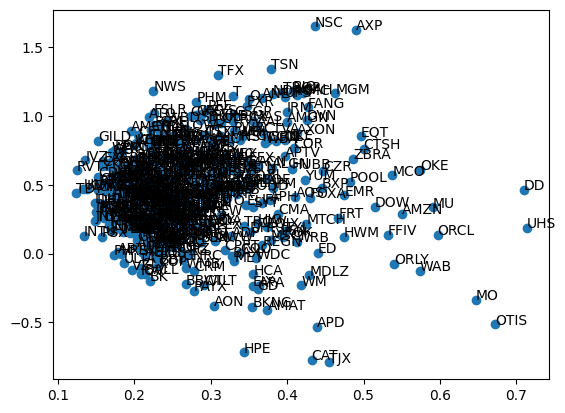

In [26]:
# Calculate volatility (standard deviation) and plot
volatility = np.sqrt(np.diag(annual_cov_matrix))

plt.scatter(volatility, annual_mean_returns, marker='o')
for i, txt in enumerate(stocks):
    plt.annotate(txt, (volatility[i], annual_mean_returns[i]))
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Mean Return')
plt.title('Return vs. Risk for Selected Stocks')
plt.show()

In [27]:
def portfolio_annual_performance(weights, mean_returns, cov_matrix):
    return np.sum(mean_returns*weights ) *252, np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_var, p_ret = portfolio_annual_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

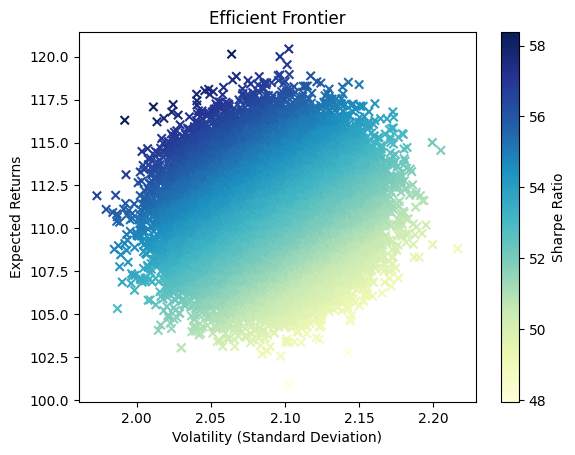

In [28]:
def efficient_frontier(mean_returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(mean_returns)
    results = np.zeros((3, num_assets*100))
    weights_record = []
    for i in range(num_assets*100):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_return, portfolio_volatility = portfolio_annual_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_volatility
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_volatility
    return results, weights_record

results, weights = efficient_frontier(annual_mean_returns, annual_cov_matrix)

# Plotting the efficient frontier
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='x')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()


In [29]:
max_sharpe = max_sharpe_ratio(annual_mean_returns, annual_cov_matrix)
max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=stocks,columns=['allocation'])
max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
print(max_sharpe_allocation)

# Add marker for the max Sharpe ratio portfolio on the plot
plt.scatter(max_sharpe.fun, portfolio_annual_performance(max_sharpe.x, annual_mean_returns, annual_cov_matrix)[0], color='r', marker='*', s=500)

ValueError: Shape of passed values is (501, 1), indices imply (503, 1)